In [1]:
import pandas as pd # used to "tidy" up and manipulate our data
import numpy as np # used for matrix and numerical calculations; foundation of pandas
from scipy import stats # contains stats functions and is used to visualise probability distributions
import matplotlib.pyplot as plt # used for visualisations
import seaborn as sns # a more user-friendly library used for visualisations

In [2]:
df=pd.read_csv('Downloads/CENSUS_INCOME.csv')
df.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE COUNTRY,INCOME
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.tail()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE COUNTRY,INCOME
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [29]:
df1=df.describe().T
df1

,count,mean,std,min,25%,50%,75%,max
AGE,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
FNLWGT,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
EDUCATION-NUM,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
CAPITAL-GAIN,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
CAPITAL-LOSS,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
HOURS-PER-WEEK,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AGE             32561 non-null  int64 
 1   WORKCLASS       32561 non-null  object
 2   FNLWGT          32561 non-null  int64 
 3   EDUCATION       32561 non-null  object
 4   EDUCATION-NUM   32561 non-null  int64 
 5   MARITAL-STATUS  32561 non-null  object
 6   OCCUPATION      32561 non-null  object
 7   RELATIONSHIP    32561 non-null  object
 8   RACE            32561 non-null  object
 9   SEX             32561 non-null  object
 10  CAPITAL-GAIN    32561 non-null  int64 
 11  CAPITAL-LOSS    32561 non-null  int64 
 12  HOURS-PER-WEEK  32561 non-null  int64 
 13  NATIVE COUNTRY  32561 non-null  object
 14  INCOME          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.shape

(32561, 15)

In [7]:
df.isnull().sum()

AGE               0
WORKCLASS         0
FNLWGT            0
EDUCATION         0
EDUCATION-NUM     0
MARITAL-STATUS    0
OCCUPATION        0
RELATIONSHIP      0
RACE              0
SEX               0
CAPITAL-GAIN      0
CAPITAL-LOSS      0
HOURS-PER-WEEK    0
NATIVE COUNTRY    0
INCOME            0
dtype: int64

In [8]:
df.duplicated().sum()

24

In [9]:
df.nunique()

AGE                  73
WORKCLASS             9
FNLWGT            21648
EDUCATION            16
EDUCATION-NUM        16
MARITAL-STATUS        7
OCCUPATION           15
RELATIONSHIP          6
RACE                  5
SEX                   2
CAPITAL-GAIN        119
CAPITAL-LOSS         92
HOURS-PER-WEEK       94
NATIVE COUNTRY       42
INCOME                2
dtype: int64

In [10]:
df['WORKCLASS'].value_counts()

WORKCLASS
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [11]:
df['OCCUPATION'] = df['OCCUPATION'].replace('?', 'Other-service')
df['NATIVE COUNTRY'] = df['NATIVE COUNTRY'].replace('?', 'United-States')
df['WORKCLASS'] = df['WORKCLASS'].replace('?', 'Private')

In [12]:
df['OCCUPATION'].value_counts()

OCCUPATION
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

In [13]:
df['OCCUPATION'].value_counts()

OCCUPATION
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

In [14]:
df['NATIVE COUNTRY'].value_counts()

NATIVE COUNTRY
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

In [15]:
df.columns

Index(['AGE', 'WORKCLASS', 'FNLWGT', 'EDUCATION', 'EDUCATION-NUM',
       'MARITAL-STATUS', 'OCCUPATION', 'RELATIONSHIP', 'RACE', 'SEX',
       'CAPITAL-GAIN', 'CAPITAL-LOSS', 'HOURS-PER-WEEK', 'NATIVE COUNTRY',
       'INCOME'],
      dtype='object')

In [16]:
df['MARITAL-STATUS'] = df['MARITAL-STATUS'].replace(['Married-civ-spouse','Married-AF-spouse'], 'Married')
df['MARITAL-STATUS'] = df['MARITAL-STATUS'].replace(['Never-married'], 'Single')
df['MARITAL-STATUS'] = df['MARITAL-STATUS'].replace(['Married-spouse-absent'], 'Separated')

In [17]:
df['MARITAL-STATUS'].value_counts()

MARITAL-STATUS
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

In [18]:
df['EDUCATION'].value_counts()

EDUCATION
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

In [19]:
df['EDUCATION'] = df['EDUCATION'].replace(['Preschool','1st-4th','5th-6th','7th-8th','12th','9th','10th','11th'],'School')
df['EDUCATION'] = df['EDUCATION'].replace(['Assoc-voc','Assoc-acdm','Prof-school','Some-college'],'High School')
df['EDUCATION'].value_counts()

EDUCATION
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

In [20]:
df['MARITAL-STATUS'].value_counts()

MARITAL-STATUS
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

In [22]:
df['EDUCATION'].value_counts()

EDUCATION
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

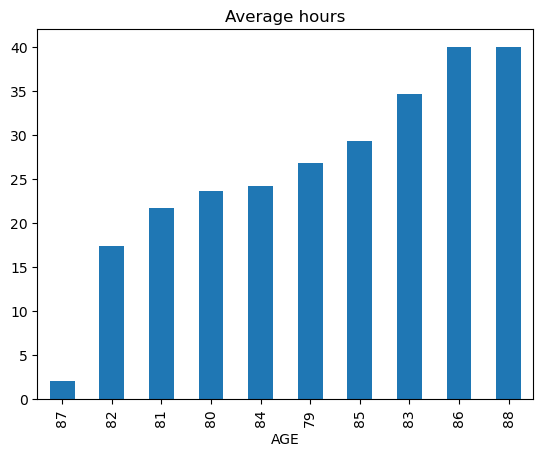

In [23]:
Average= df.groupby('AGE')['HOURS-PER-WEEK']\
              .agg(['count', 'mean'])\
              .sort_values(by='count', ascending=True)\
              .head(10) #to keep only the 10 most popular Subjects

Average['mean'].sort_values().plot.bar()
plt.title('Average hours');

In [30]:
df1.corr()

,count,mean,std,min,25%,50%,75%,max
count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.000000,0.998003,0.999983,0.999985,0.999985,0.999985,0.998153
std,NaN,0.998003,1.000000,0.997622,0.997639,0.997642,0.997643,0.999997
min,NaN,0.999983,0.997622,1.000000,0.999999,0.999999,0.999999,0.997787
25%,NaN,0.999985,0.997639,0.999999,1.000000,1.000000,1.000000,0.997803
50%,NaN,0.999985,0.997642,0.999999,1.000000,1.000000,1.000000,0.997806
75%,NaN,0.999985,0.997643,0.999999,1.000000,1.000000,1.000000,0.997806
max,NaN,0.998153,0.999997,0.997787,0.997803,0.997806,0.997806,1.000000


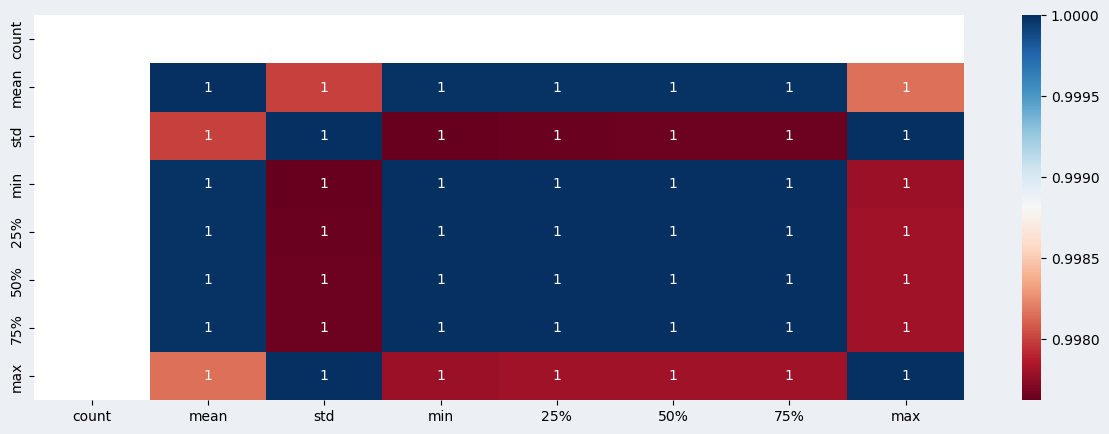

In [40]:
#sns.heatmap(df1.corr(),annot=True)
#plt.show();
plt.figure(figsize=(15,5), facecolor="#ECEFF4")
sns.heatmap(df1.corr(),cmap="RdBu",annot=True);


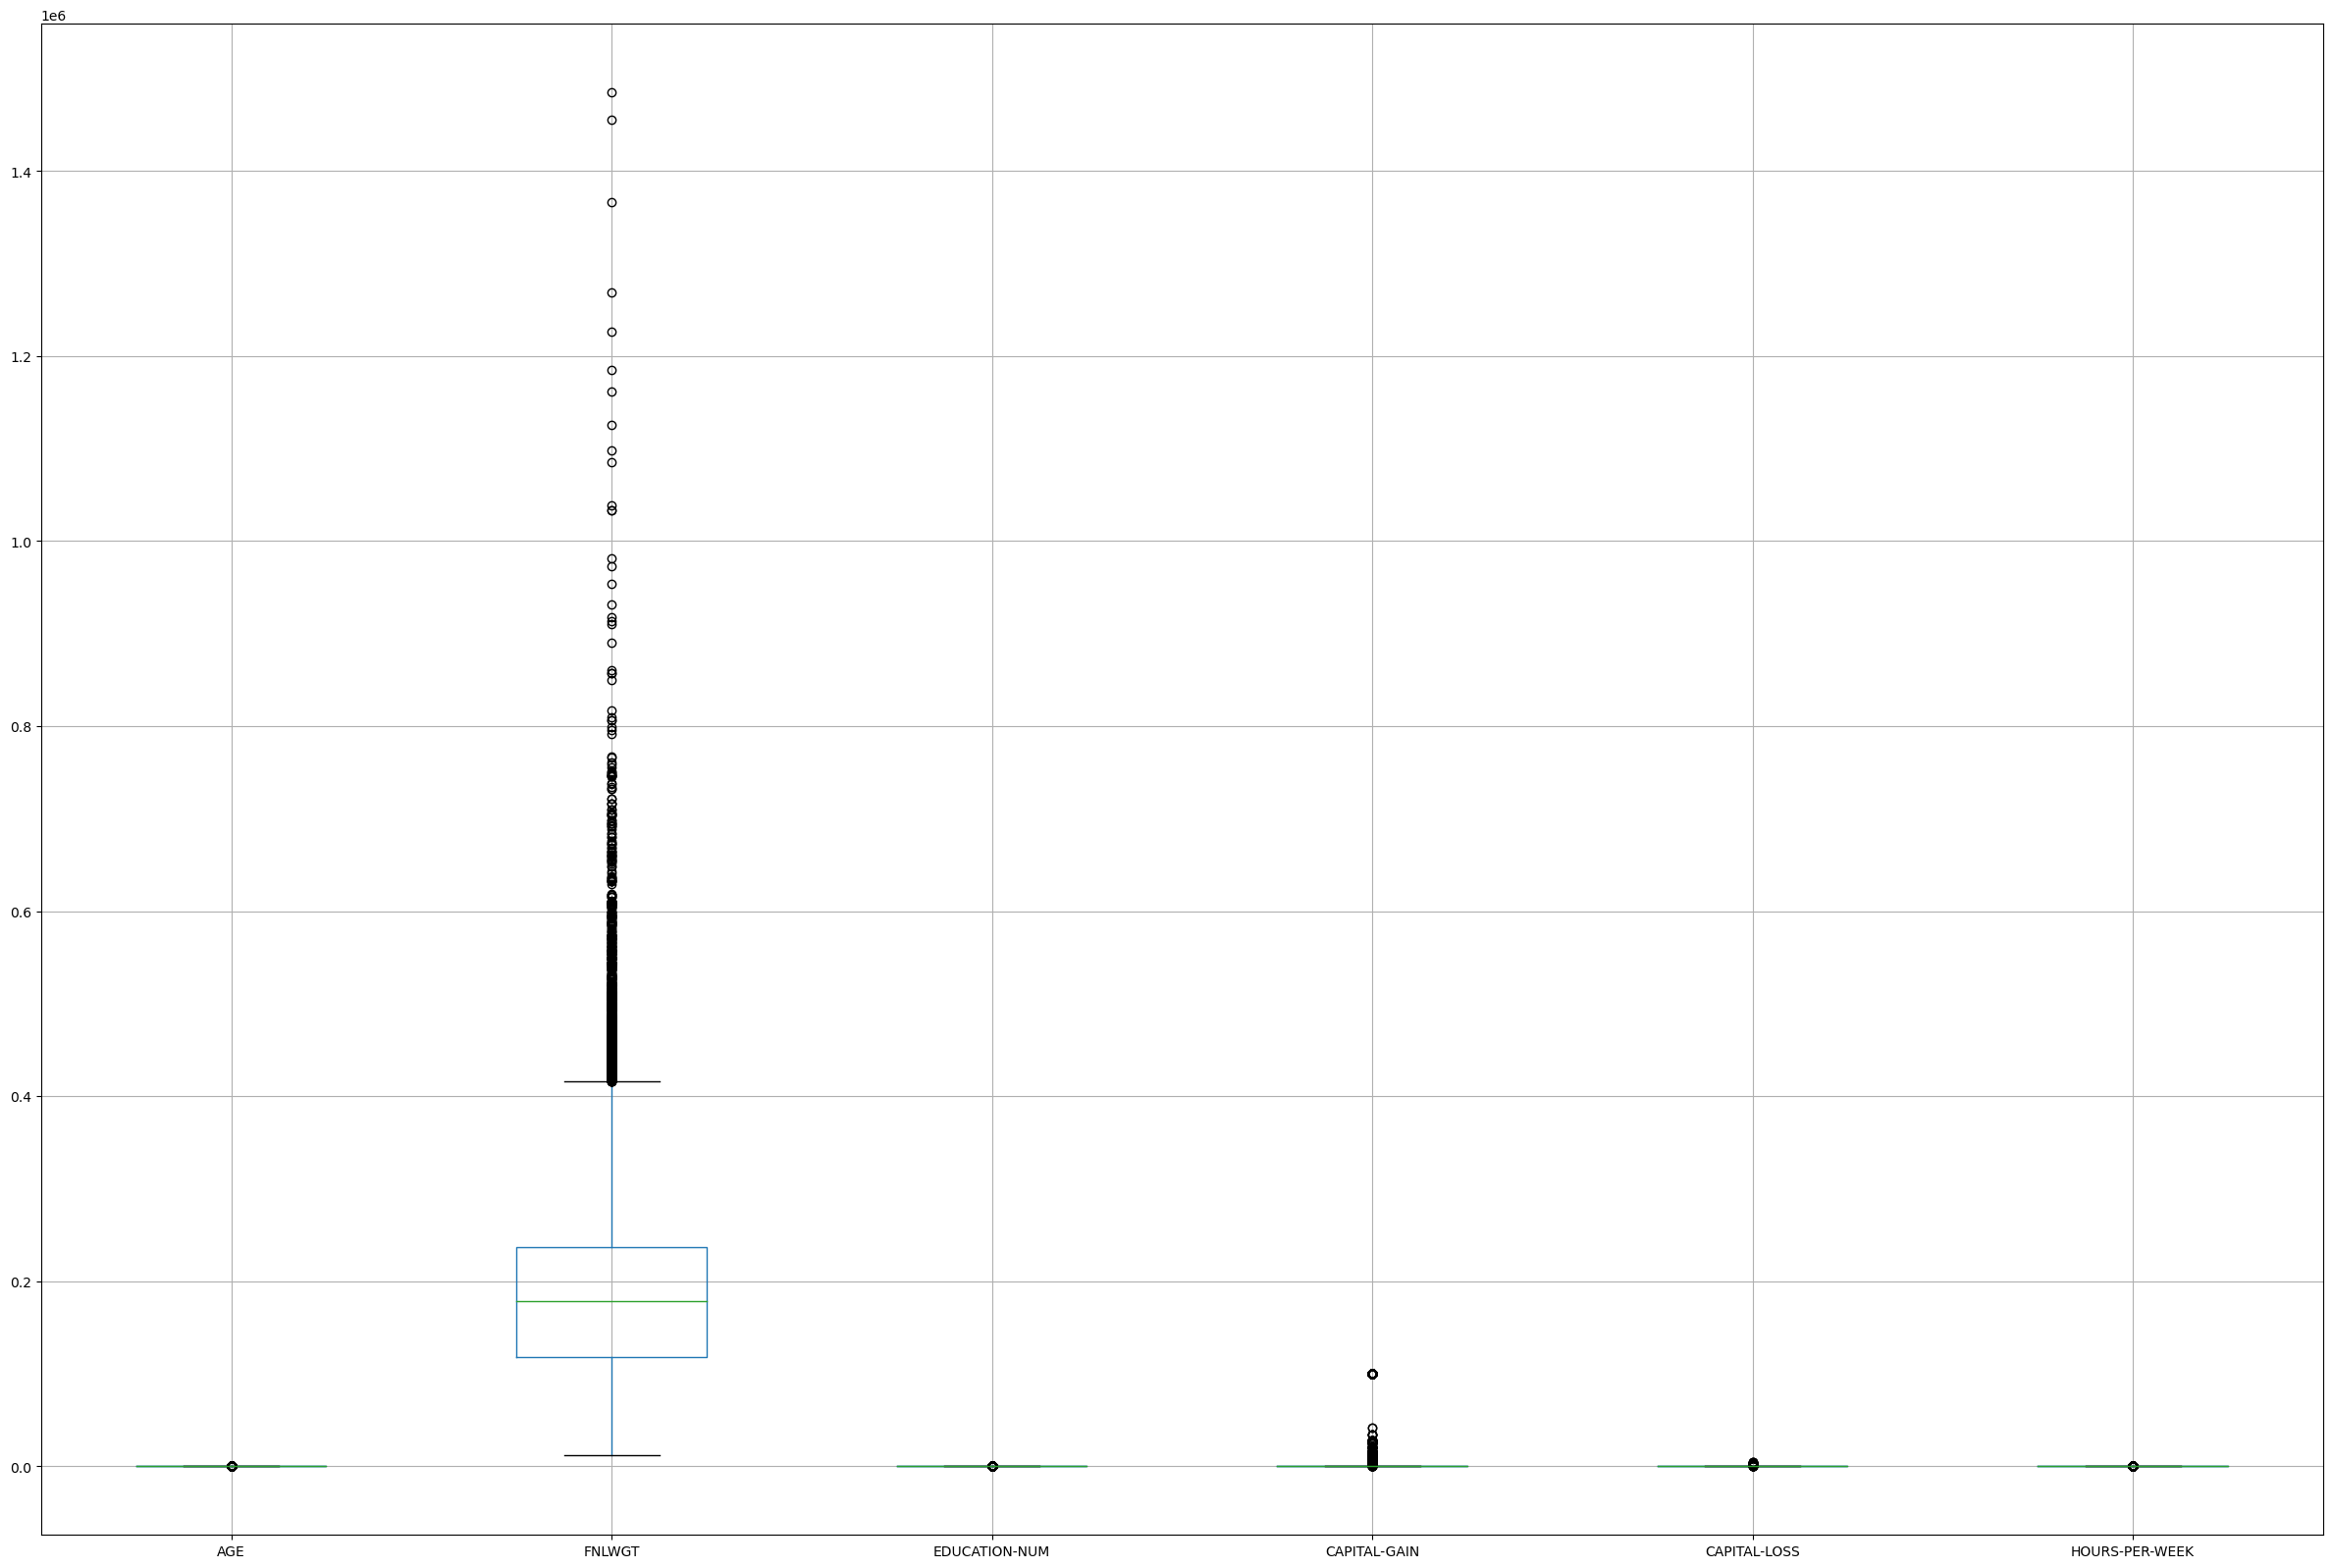

In [32]:
df.boxplot(figsize=(30,20));

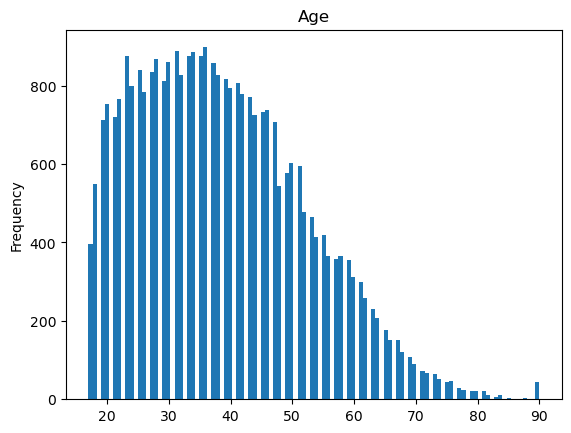

In [33]:
df['AGE'].plot(kind='hist',bins=110,title='Age');

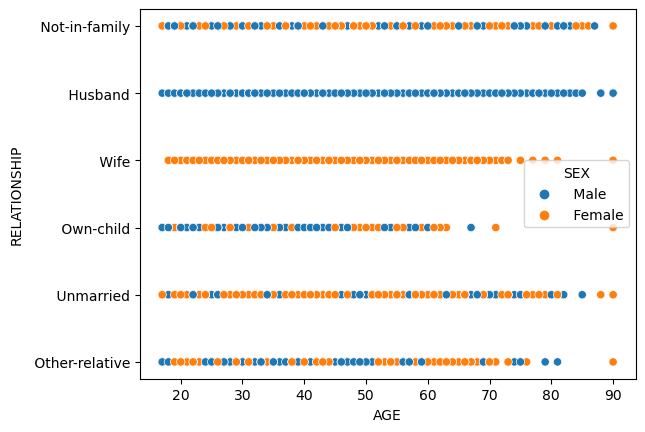

In [34]:
sns.scatterplot(x='AGE',y='RELATIONSHIP',hue='SEX',data=df);


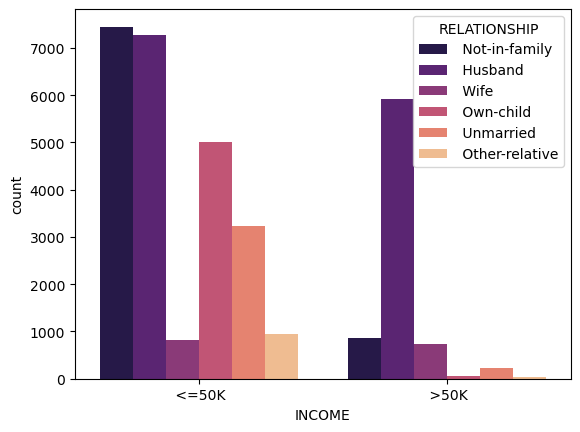

In [50]:
sns.countplot(x='INCOME', palette='magma', hue='RELATIONSHIP',data=df);

In [62]:
sns.countplot( x='INCOME', hue='RACE', data=df,figsize(30,20));

SyntaxError: positional argument follows keyword argument (1596557361.py, line 1)

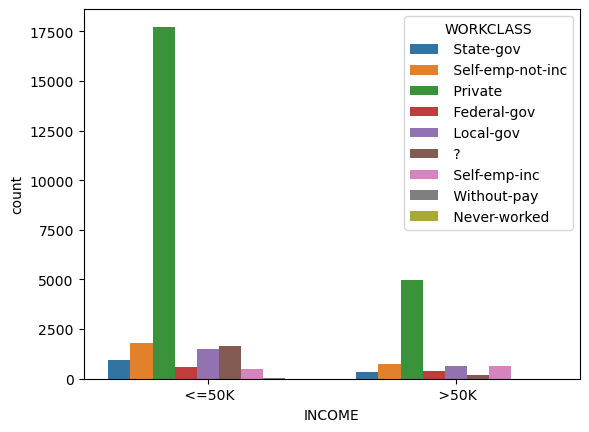

In [65]:
sns.countplot(x ='INCOME', hue= 'WORKCLASS', data=df);

C:\Users\chira\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


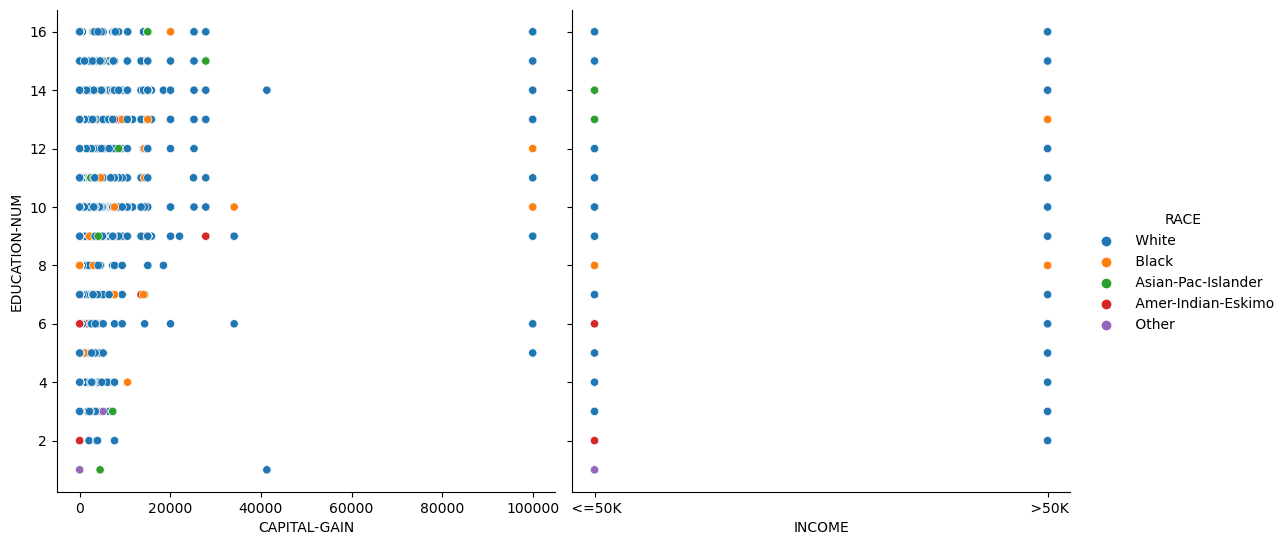

In [75]:
sns.pairplot(x_vars=['CAPITAL-GAIN','INCOME'],
             y_vars=['EDUCATION-NUM'], 
             hue='RACE', 
             height=5.5,
             data=df);